# Most frequent value imputation

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
df = pd.read_csv('housing_data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

FileNotFoundError: [Errno 2] No such file or directory: 'housing_data.csv'

In [ ]:
df.head()

In [30]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

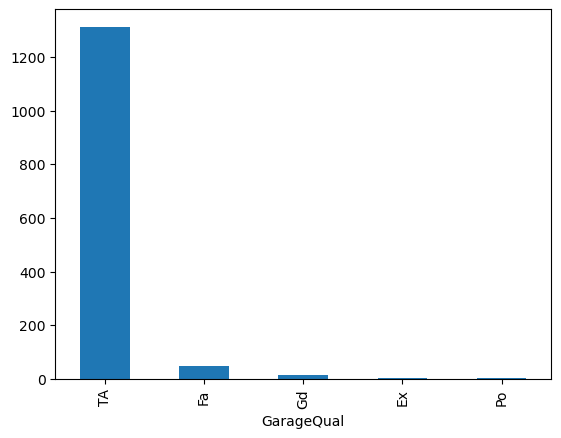

In [31]:
df['GarageQual'].value_counts().plot(kind="bar")

In [32]:
df["GarageQual"].mode()

0    TA
Name: GarageQual, dtype: object

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

TypeError: 'module' object is not callable

In [34]:
temp = df[df['GarageQual']=='TA']['SalePrice']

<Axes: xlabel='GarageQual'>

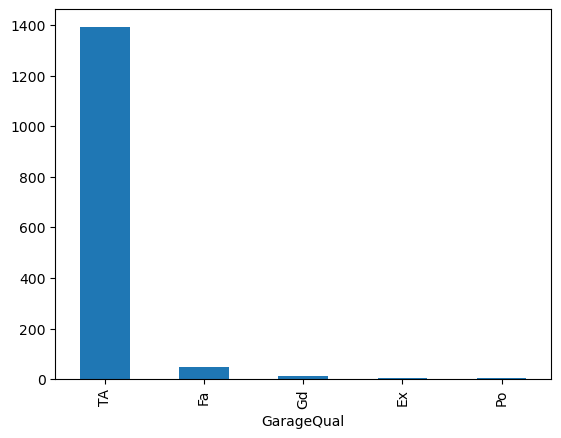

In [14]:
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

TypeError: 'module' object is not callable

<Axes: xlabel='FireplaceQu'>

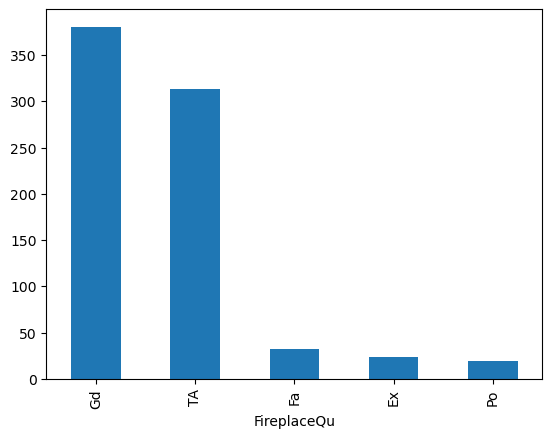

In [36]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [37]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

<Axes: xlabel='FireplaceQu'>

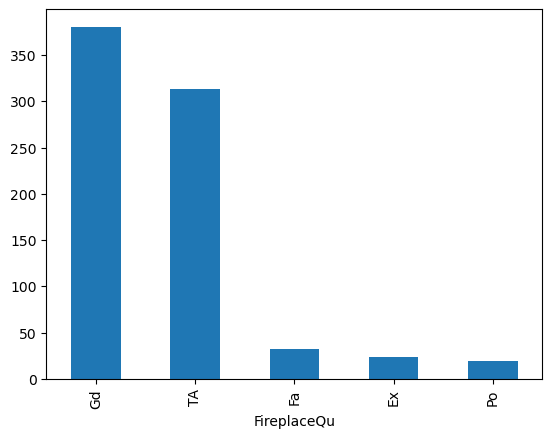

In [38]:
df["FireplaceQu"].value_counts().plot(kind='bar')

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')
Text(0.5, 1.0, 'FireplaceQu')

TypeError: 'module' object is not callable

In [40]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

<Axes: xlabel='FireplaceQu'>

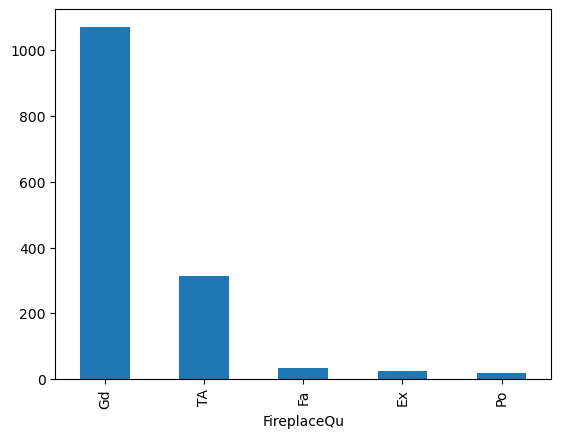

In [24]:
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

TypeError: 'module' object is not callable

# Sklearn

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')


In [45]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

In [46]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)